# Computational Intelligence (CIS6005) - Assignment Section B
__Vladimir Wolfgang Schmadlak, st20283948__

In [1]:
# Cell 1: Import Libraries

# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keras and TensorFlow for Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import array_to_img

# Sklearn for data preprocessing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Dataset
from keras.datasets import cifar10

# Others
import os

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


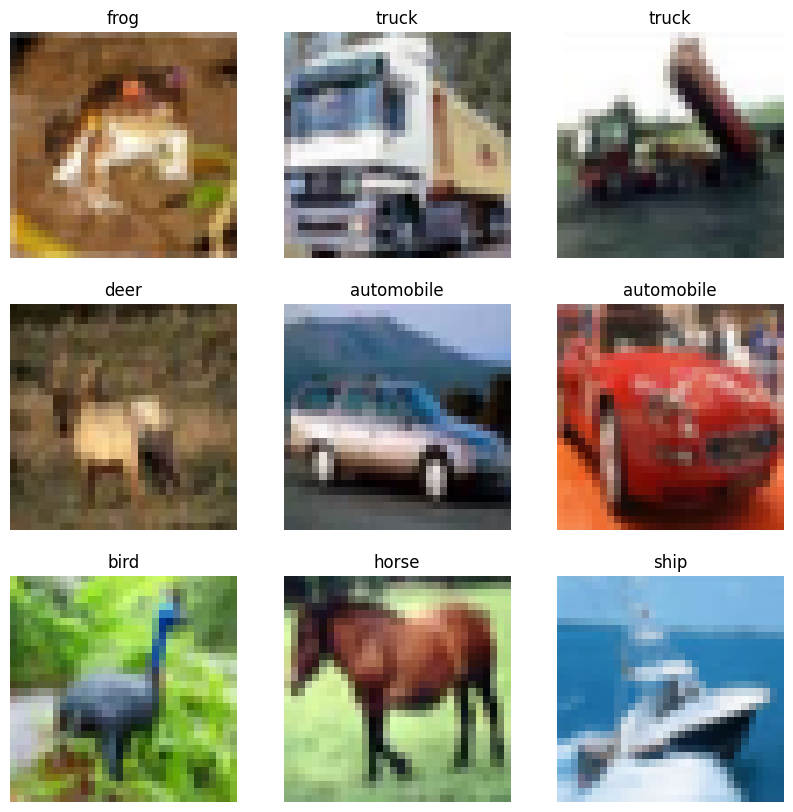

In [2]:
# Cell 2: Load and Explore Dataset

# Load CIFAR-10 Dataset
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

# Define label names for CIFAR-10 dataset
LABEL_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print shapes of the Dataset
print(f"Training data shape: {x_train_all.shape}")
print(f"Training labels shape: {y_train_all.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Display a few images from the Dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(array_to_img(x_train_all[i]))
    plt.title(LABEL_NAMES[y_train_all[i][0]])
    plt.axis('off')
plt.show()

In [3]:
# Cell 3: Preprocess Data

# Normalize pixel values to be between 0 and 1
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

# One-hot encode the labels
y_train_all = to_categorical(y_train_all, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create a validation set from the training data
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=42)

# Display shapes to confirm the split
print(f"New training data shape: {x_train.shape}")
print(f"New training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")

New training data shape: (40000, 32, 32, 3)
New training labels shape: (40000, 10)
Validation data shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 10)


In [4]:
# Cell 4: First Neural Network Model

# Define the CNN architecture
model_1 = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.1),
    
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        2

In [5]:
# Cell 5: Train the First Neural Network Model

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=0.0001)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

print("Training complete!")

Epoch 1/30
625/625 [==============================] - 27s 42ms/step - loss: 1.6003 - accuracy: 0.4356 - val_loss: 1.5259 - val_accuracy: 0.4615 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 27s 43ms/step - loss: 1.1947 - accuracy: 0.5757 - val_loss: 1.3159 - val_accuracy: 0.5364 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 27s 44ms/step - loss: 1.0452 - accuracy: 0.6326 - val_loss: 1.0887 - val_accuracy: 0.6274 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 32s 52ms/step - loss: 0.9531 - accuracy: 0.6656 - val_loss: 1.1817 - val_accuracy: 0.6124 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 30s 47ms/step - loss: 0.8695 - accuracy: 0.6959 - val_loss: 0.9449 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 30s 48ms/step - loss: 0.8192 - accuracy: 0.7133 - val_loss: 0.9433 - val_accuracy: 0.6722 - lr: 0.0010
Epoch 7/30
625/625 [==============================] - 30s 

In [6]:
# Cell 6: Second Neural Network Model

# Define the CNN architecture
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)       

In [7]:
# Cell 7: Train the Second Neural Network Model

early_stopping_2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=0.0001)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping_2, reduce_lr_2]
)

print("Training complete!")

Epoch 1/30
625/625 [==============================] - 31s 49ms/step - loss: 1.6145 - accuracy: 0.4361 - val_loss: 1.3509 - val_accuracy: 0.5263 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 31s 50ms/step - loss: 1.1152 - accuracy: 0.6089 - val_loss: 1.1637 - val_accuracy: 0.5988 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 31s 50ms/step - loss: 0.9591 - accuracy: 0.6648 - val_loss: 0.9597 - val_accuracy: 0.6603 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 31s 49ms/step - loss: 0.8773 - accuracy: 0.6954 - val_loss: 0.8743 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 31s 50ms/step - loss: 0.8117 - accuracy: 0.7183 - val_loss: 0.8582 - val_accuracy: 0.6946 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 31s 50ms/step - loss: 0.7722 - accuracy: 0.7314 - val_loss: 0.8095 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 7/30
625/625 [==============================] - 31s 

Model 1 - Test Loss: 0.6942, Test Accuracy: 0.7623
Model 2 - Test Loss: 0.7143, Test Accuracy: 0.7563


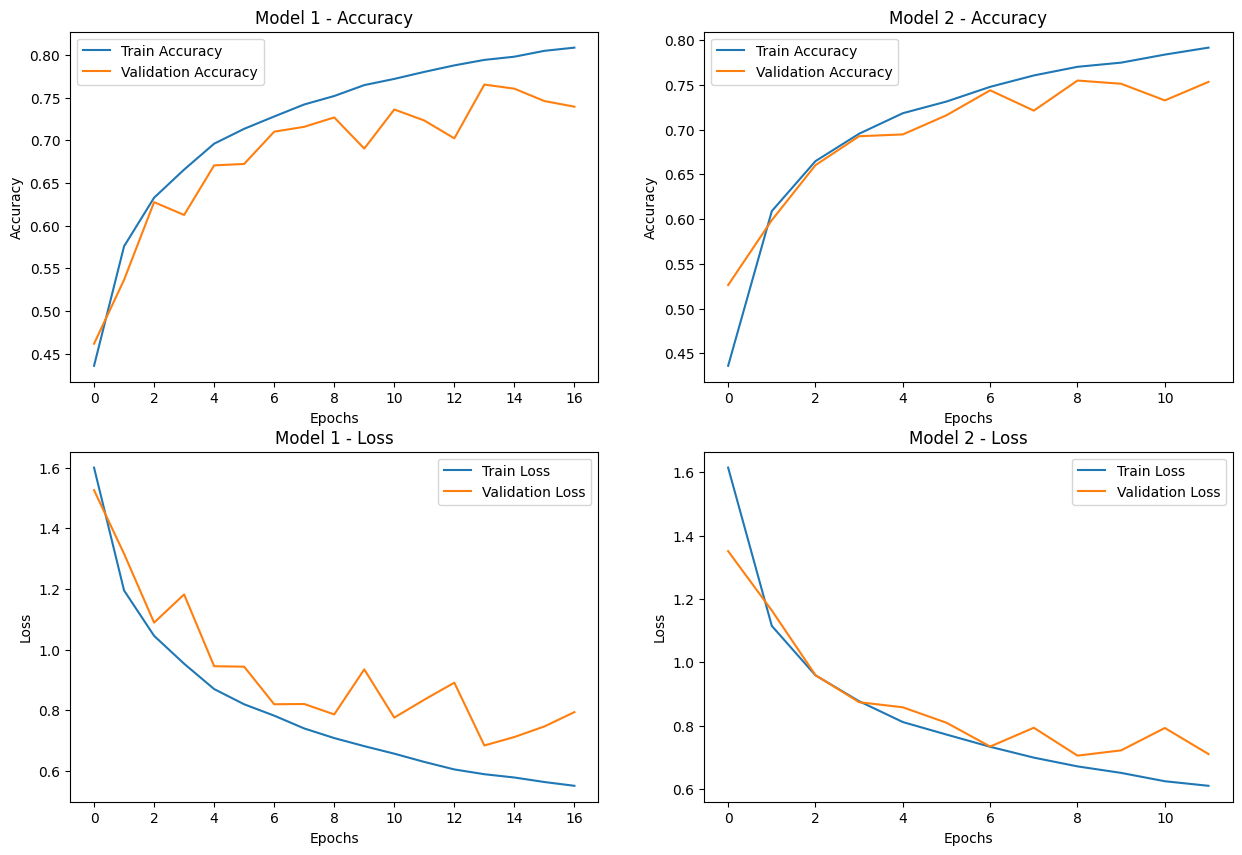

In [8]:
# Cell 8: Evaluate and Compare the Models

# Evaluate the first model on the test set
test_loss_1, test_accuracy_1 = model_1.evaluate(x_test, y_test, verbose=0)

# Evaluate the second model on the test set
test_loss_2, test_accuracy_2 = model_2.evaluate(x_test, y_test, verbose=0)

# Print out the model metrics
print(f"Model 1 - Test Loss: {test_loss_1:.4f}, Test Accuracy: {test_accuracy_1:.4f}")
print(f"Model 2 - Test Loss: {test_loss_2:.4f}, Test Accuracy: {test_accuracy_2:.4f}")

# Plot accuracy and loss graphs for both models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy of model 1
axs[0, 0].plot(history_1.history['accuracy'], label='Train Accuracy')
axs[0, 0].plot(history_1.history['val_accuracy'], label='Validation Accuracy')
axs[0, 0].set_title('Model 1 - Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Loss of model 1
axs[1, 0].plot(history_1.history['loss'], label='Train Loss')
axs[1, 0].plot(history_1.history['val_loss'], label='Validation Loss')
axs[1, 0].set_title('Model 1 - Loss')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Accuracy of model 2
axs[0, 1].plot(history_2.history['accuracy'], label='Train Accuracy')
axs[0, 1].plot(history_2.history['val_accuracy'], label='Validation Accuracy')
axs[0, 1].set_title('Model 2 - Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# Loss of model 2
axs[1, 1].plot(history_2.history['loss'], label='Train Loss')
axs[1, 1].plot(history_2.history['val_loss'], label='Validation Loss')
axs[1, 1].set_title('Model 2 - Loss')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].legend()

plt.show()

313/313 [==============================] - 3s 8ms/step


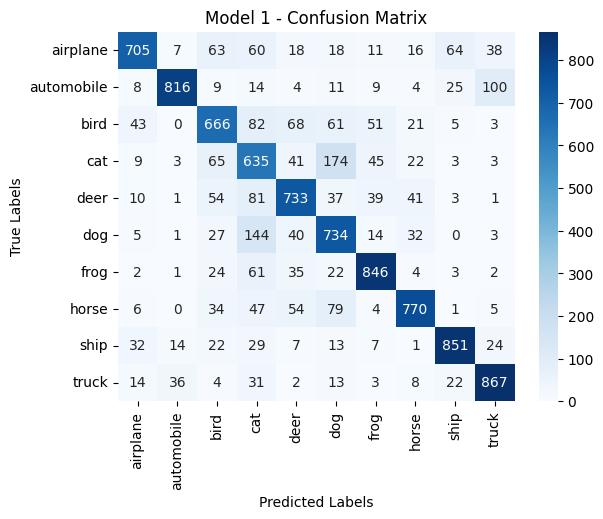

313/313 [==============================] - 3s 8ms/step


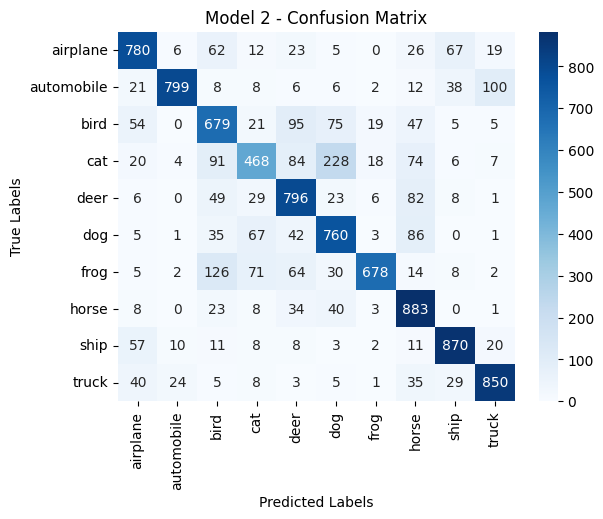

In [9]:
# Cell 9: Visual Performance Analysis - Confusion Matrices

# Confusion Matrix for Model 1
predictions_1 = model_1.predict(x_test).argmax(axis=1)
cm_1 = confusion_matrix(y_test.argmax(axis=1), predictions_1)
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=LABEL_NAMES, yticklabels=LABEL_NAMES)
plt.title('Model 1 - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Confusion Matrix for Model 2
predictions_2 = model_2.predict(x_test).argmax(axis=1)
cm_2 = confusion_matrix(y_test.argmax(axis=1), predictions_2)
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=LABEL_NAMES, yticklabels=LABEL_NAMES)
plt.title('Model 2 - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [10]:
# Cell 10: Detailed Performance Metrics - Classification Reports

# Predictions for Model 1
predictions_1 = model_1.predict(x_test).argmax(axis=1)
# Classification Report for Model 1
print("Classification Report for Model 1:")
print(classification_report(y_test.argmax(axis=1), predictions_1, target_names=LABEL_NAMES))

# Predictions for Model 2
predictions_2 = model_2.predict(x_test).argmax(axis=1)
# Classification Report for Model 2
print("Classification Report for Model 2:")
print(classification_report(y_test.argmax(axis=1), predictions_2, target_names=LABEL_NAMES))

313/313 [==============================] - 3s 8ms/step
Classification Report for Model 1:
              precision    recall  f1-score   support

    airplane       0.85      0.70      0.77      1000
  automobile       0.93      0.82      0.87      1000
        bird       0.69      0.67      0.68      1000
         cat       0.54      0.64      0.58      1000
        deer       0.73      0.73      0.73      1000
         dog       0.63      0.73      0.68      1000
        frog       0.82      0.85      0.83      1000
       horse       0.84      0.77      0.80      1000
        ship       0.87      0.85      0.86      1000
       truck       0.83      0.87      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.77      0.76      0.77     10000

313/313 [==============================] - 3s 8ms/step
Classification Report for Model 2:
              precision    recall  f1-score   support

    ai